# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#characteristics">Data Characteristics</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This a dataset for +110k medical appointments in Brazil, and focused on if the patient show-up or no-show to the appointment.

<a id='characteristics'></a>
## Data Characteristics

>1- PatientId : Identification of a patient.<br>
>2- AppointmentID : Identification of each appointment.<br>
>3- Gender : Male or Female.<br>
>4- ScheduledDay : The day of the actuall appointment, when they have to visit the doctor.<br>
>5- AppointmentDay : The day someone called or registered the appointment, this is before appointment of course.<br>
>6- Age : How old is the patient.<br>
>7- Neighbourhood : Where the appointment takes place.<br>
>8- Scholarship : True of False.  <br>
>9- Hipertension : True or False. <br>
>10- Diabetes : True or False. <br>
>11- lcoholism : True or False. <br>
>12- Handcap : True or False. <br>
>13- SMS_received : 0 or 1 if messages sent to the patient.<br>
>14- No-show : True or False.<br>

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 
### General Properties

In [1]:
# Importing statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline

In [2]:
# Loading data
df = pd.read_csv('noshowappointments.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Getting the number of patients (rows) and thier characteristics (columns)
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


--no missing data-- 

In [5]:
# Checking duplications
df.duplicated().sum()

0

In [6]:
# Checking null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

--the dataset has no duplications and no null values--

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* Mean of patients ages is 37 years
* Maximum patient age = 115 years
* The minimum age doesn't make sence, it's equal to -1 

### Data Cleaning

In [9]:
# Droping unnecessary columns: (PatientId - AppointmentID - ScheduledDay - AppointmentDay)
df.drop(['PatientId','AppointmentID', 'ScheduledDay'], inplace=True, axis= 1)
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# rename the 'No-show' column to 'Showed'
# 'Hipertension' to 'Hypertension' 
df.rename(columns= {'Hipertension':'Hypertension', 'No-show':'Showed'}, inplace=True)

In [11]:
# change AppointmentDay to date type
df.AppointmentDay =  pd.to_datetime(df.AppointmentDay)

In [12]:
# get the weekday from AppointmentDay
df.AppointmentDay = df.AppointmentDay.dt.day_name()

In [13]:
df.SMS_received.unique()

array([0, 1], dtype=int64)

In [16]:
# change NoShow values from (Yes-No) to (True-False)
# change Scholarship, Hypertension, Diabetes, Alcoholism, Handcap, SMS_received values from (1-0) to (True-False)

df.Showed.replace(['Yes','No'],['False','True'], inplace = True)
df.Scholarship.replace([0,1],['False','True'], inplace = True)
df.Hypertension.replace([0,1],['False','True'], inplace = True)
df.Diabetes.replace([0,1],['False','True'], inplace = True)
df.Alcoholism.replace([0,1],['False','True'], inplace = True)
df.Handcap.replace([0,1],['False','True'], inplace = True)
df.SMS_received.replace([0,1],['False','True'], inplace = True)

In [17]:
#recheck
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed
0,F,Friday,62,JARDIM DA PENHA,False,True,False,False,False,False,True
1,M,Friday,56,JARDIM DA PENHA,False,False,False,False,False,False,True
2,F,Friday,62,MATA DA PRAIA,False,False,False,False,False,False,True
3,F,Friday,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True
4,F,Friday,56,JARDIM DA PENHA,False,True,True,False,False,False,True


In [18]:
# recheck
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   AppointmentDay  110527 non-null  object
 2   Age             110527 non-null  int64 
 3   Neighbourhood   110527 non-null  object
 4   Scholarship     110527 non-null  object
 5   Hypertension    110527 non-null  object
 6   Diabetes        110527 non-null  object
 7   Alcoholism      110527 non-null  object
 8   Handcap         110527 non-null  object
 9   SMS_received    110527 non-null  object
 10  Showed          110527 non-null  object
dtypes: int64(1), object(10)
memory usage: 9.3+ MB


In [20]:
# clean the ages -- there is ages with the num = -1
df = df.loc[df.Age > 0]

df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   3,   1,  69,  68,  60,  67,  36,  10,  35,
        20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,  24,
        66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,  14,
         9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,  86,
        91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99], dtype=int64)

In [21]:
df.describe()

,Age
count,106987.000000
mean,38.316085
std,22.466214
min,1.000000
25%,19.000000
50%,38.000000
75%,56.000000
max,115.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 :
### Can gender effects to the oppointments?

Number of Males: 36869
Number of Females: 70118


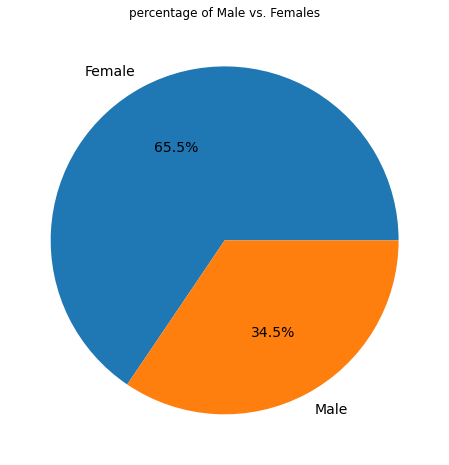

In [23]:
# make a comparison between male and female to detect if the gender effects to the oppointments 

df.Gender.value_counts().plot(kind='pie', labels =['Female', 'Male'], autopct='%1.1f%%', fontsize = 14, figsize=(8,8));
plt.title('percentage of Male vs. Females');
plt.ylabel('')
print('Number of Males: {}'.format(df.Gender.value_counts()['M']))
print('Number of Females: {}'.format(df.Gender.value_counts()['F']))

* women take way more care of thier health in comparison to men.

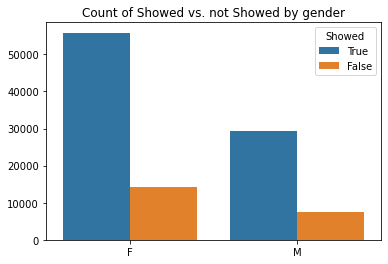

In [46]:
sns.countplot(x = df.Gender, hue=df.Showed, data= df)
plt.title('Count of Showed vs. not Showed by gender')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [25]:
df.groupby(['Gender'])['Showed'].value_counts()

Gender  Showed
F       True      55843
        False     14275
M       True      29464
        False      7405
Name: Showed, dtype: int64

* There are about 29464 patients from Males came for oppointments and 7405 did not come.<br>
* For the Females, there are about 55843 patients came and 14275 did not came.

### Research Question 2 :
### What are the percentage of the showed and not showed patients?

Number of Showed patients: 85307
Number of Not Showed patients: 21680


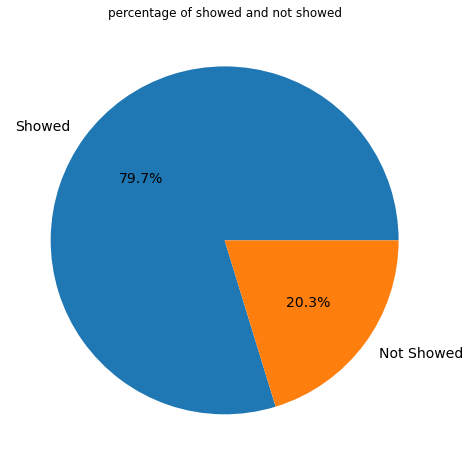

In [28]:
df.Showed.value_counts().plot(kind='pie', labels =['Showed', 'Not Showed'], autopct='%1.1f%%', fontsize = 14, figsize=(8,8));
plt.title('percentage of showed and not showed');
plt.ylabel('')
print('Number of Showed patients: {}'.format(df.Showed.value_counts()['True']))
print('Number of Not Showed patients: {}'.format(df.Showed.value_counts()['False']))

### Research Question 3 :
### Does the Neighbourhood effects the show of patients?

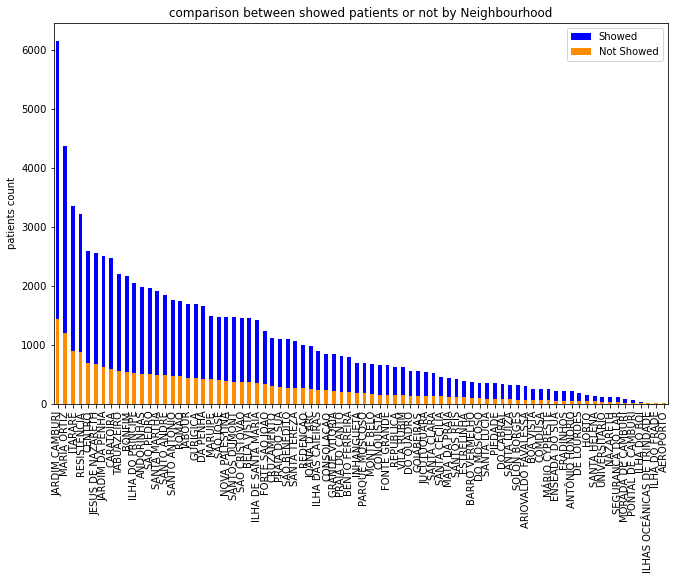

In [50]:
df[df.Showed == 'True'].Neighbourhood.value_counts().plot(kind = 'bar', color = 'blue', label = 'Showed', figsize=(11,7));
df[df.Showed == 'False'].Neighbourhood.value_counts().plot(kind = 'bar', color = 'darkorange', label = 'Not Showed', figsize=(11,7));
plt.legend();
plt.title('comparison between showed patients or not by Neighbourhood');
plt.ylabel('patients count');

* Neighbourhood has a great effect on attendance or not.<br>
* JARDIM CAMBURI has the greatest number of patients.

### Research Question 4 :
### Can age effects to the oppointments?

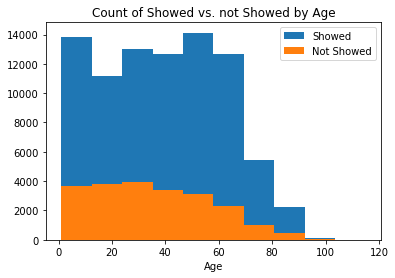

In [26]:
df.groupby(df[df.Showed == 'True'].Showed)['Age'].hist();
df.groupby(df[df.Showed == 'False'].Showed)['Age'].hist();
plt.title('Count of Showed vs. not Showed by Age')
plt.xlabel('Age');
plt.grid(False);
plt.legend(['Showed', 'Not Showed']);

In [27]:
df.groupby(df[df.Showed == 'True'].Showed)['Age'].value_counts()

Showed  Age
True    1      1858
        52     1449
        56     1372
        2      1366
        59     1357
               ... 
        98        5
        100       4
        102       2
        115       2
        99        1
Name: Age, Length: 102, dtype: int64

In [53]:
print(df.groupby(df[df.Showed == 'True'].Showed)['Age'].mean())
print(df.groupby(df[df.Showed == 'False'].Showed)['Age'].mean())

Showed
True    39.075187
Name: Age, dtype: float64
Showed
False    35.329151
Name: Age, dtype: float64


* Most of patients who are showed are at the range of 1:5 then 52:60.
* Mean of Showed patients = 39
* Mean of Not Showed patients = 35

### Research Question 5 :
### Does the SMS received factor effects the show of patients?

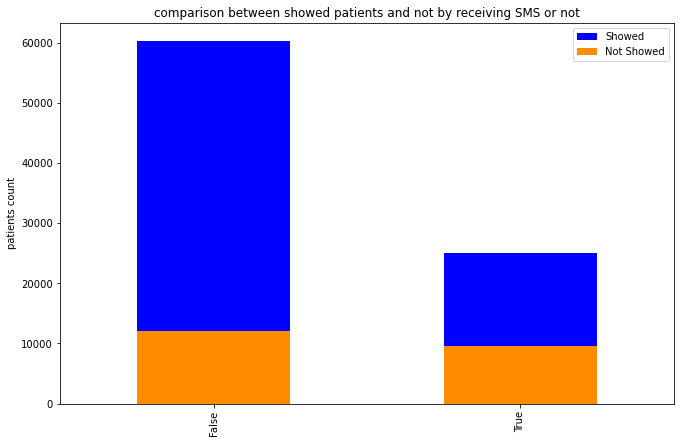

In [55]:
df[df.Showed == 'True'].SMS_received.value_counts().plot(kind = 'bar', color = 'blue', label = 'Showed', figsize=(11,7));
df[df.Showed == 'False'].SMS_received.value_counts().plot(kind = 'bar', color = 'darkorange', label = 'Not Showed', figsize=(11,7));
plt.legend();
plt.title('comparison between showed patients and not by receiving SMS or not');
plt.ylabel('SMS received');
plt.ylabel('patients count');

* The Showed patients that have not received SMS is greater than Showed patients that have received.

### Research Question 6 :
### Is there a specific day has no show patients more than the others?

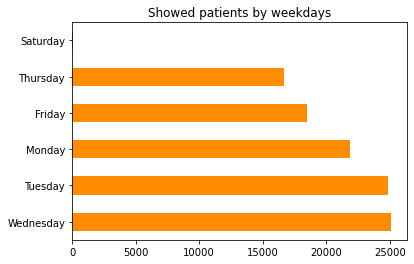

In [57]:
# for the showed patients
df.AppointmentDay.value_counts().plot(kind='barh',color ="darkorange");
plt.title('Showed patients by weekdays');

In [58]:
df.AppointmentDay.value_counts()

Wednesday    25090
Tuesday      24831
Monday       21903
Friday       18465
Thursday     16659
Saturday        39
Name: AppointmentDay, dtype: int64

* The most day that has no show patients than the others is Saturday.

<a id='conclusions'></a>
## Conclusions

> * Women take way more care of thier health in comparison to men.<br>
> There are about 55843 patients came and 14275 did not came instead of men,<br>
> There are about 29464 patients from Males came for oppointments and 7405 did not come.
> * The percentage of showed patients is 79.7% and not showed is 20.3%.
> * Most of patients who has showed are at the age range of 1:5 then 52:60.
> * Neighbourhood has a great effect on attendance or not.<br>
> * The Showed patients that have not received SMS is greater than Showed patients that have received.
> * Saturday is the most day that has no show patients than the others